# GNOD Song Suggester

## Web Scraping Hot 100 from Billboard

 Scraping the current top 100 songs and their respective artists from https://www.billboard.com/charts/hot-100, and putting the information into a pandas dataframe.

In [125]:
# importing libraries

from bs4 import BeautifulSoup
import re 
import requests
import pandas as pd
from tqdm.notebook import tqdm
import random
from random import randint
import warnings
warnings.filterwarnings("ignore")

### Getting the info from the web

In [2]:
# storing link in a variable
url = "https://www.billboard.com/charts/hot-100"
# downloading  html with a get request
response = requests.get(url)
# check response status code 
response.status_code

200

In [3]:
# parsing and storing the contents of the url call
billboardsoup = BeautifulSoup(response.content, 'html.parser')
# prettifying the soup 
billboardsoup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/icon-144x

### Querying the soup to get song title & artist

In [4]:
# getting song title

billboardsoup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

'Easy On Me'

In [5]:
# getting artist

billboardsoup.select('span.c-label.a-font-primary-s')[0].get_text(strip=True)

'Adele'

In [6]:
# checking the amount of results

top_100 = len(billboardsoup.select('h3.c-title.a-no-trucate'))
top_100

100

In [7]:
# looping the songs

song = []
artist = []

for i in tqdm(range(top_100)):
    song.append(billboardsoup.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artist.append(billboardsoup.select('span.c-label.a-font-primary-s')[i].get_text(strip=True))

  0%|          | 0/100 [00:00<?, ?it/s]

### Getting the dataframe and storing it

In [8]:
billboard_top100 = pd.DataFrame({'song':song,'artist':artist})

In [9]:
billboard_top100.head()

,song,artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele


In [10]:
# billboard_top100.to_csv(r'billboard_top100.csv', index = False, header = True)

## Adding more songs: Scraping top 500 songs of all times from Rolling Stone

**On pause, since I found the playlist on spotify**

Because no one really likes the top 100 hot songs I'm going to be using the top 500 songs of all time from Rolling Stones (the 2004 version, not the 2021) from this website https://www.cs.ubc.ca/~davet/music/list/Best9.html

### Getting the info from the web

### Querying the soup to get song title & artist

### Getting the dataframe and storing it

In [11]:
# best_500.to_csv(r'best_500.csv', index = False, header = True)

## Creating the First Suggester

### The input

In [12]:
def suggester():
    song = str(input("What song do you have in mind?: ").lower().replace(" ", ''))
    # check hot 100
    check = billboard_top100[billboard_top100['song'].str.lower().str.replace(" ","").str.contains(song)]
    # get index
    index = check.index.tolist()
    if len(check) == 0:
        print("Oh well, my bad, but that song is not hot. Anyway! Good for you for not following the crowds!")
        song2 = str(input("Want to try again? [y/n]: ")).lower().replace(" ", '')
        if song2 == 'y':
            print('Awesome! Here, have another go:')
            suggester()
        else:
            print('Oh well, your bad, this is an awesome recommender')
    else:
        answer1 = input("Are you thinking about '" + billboard_top100.song[index].values[0] + "' by '" + billboard_top100.artist[index].values[0] + "'? [y/n]: ")
    #make a song suggestion
        if answer1.lower() == 'y':
            suggestion = billboard_top100.sample().index.tolist()
            print("Then listen to '" + billboard_top100['song'][suggestion].item() + "' by '" + billboard_top100['artist'][suggestion].item() + "' I think you'll like it.")
            song2 = str(input("Want to try again? [y/n]: ")).lower().replace(" ", '')
            if song2 == 'y':
                print('Awesome! Here, have another go:')
                suggester()
            else:
                print('Oh well, your bad, this is an awesome recommender')
        else:
            print("That song is not hot, good for you for not following the crowds!")
            song2 = str(input("Want to try again? [y/n]: ")).lower().replace(" ", '')
            if song2 == 'y':
                print('Awesome! Here, have another go:')
                suggester()
            else:
                print('Oh well, your bad, this is an awesome recommender')
            
suggester()

What song do you have in mind?: stay
Are you thinking about 'Stay' by 'The Kid LAROI & Justin Bieber'? [y/n]: y
Then listen to 'To Be Loved' by 'Adele' I think you'll like it.
Want to try again? [y/n]: n
Oh well, your bad, this is an awesome recommender


## Spotipy (API Wrappers)

In [16]:
# more libraries, you can never have enough

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pprint

In [17]:
client_id = str(getpass.getpass('client_id: '))
client_secret = str(getpass.getpass('client_secret: '))
# embedding getpass credentials in the access key
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

client_id: ········
client_secret: ········


### Choosing some playlist to create a dataframe

### The 80's all lined up

In [18]:
first_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DXbB7yFaZiAQX")
first_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [19]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
first_results = get_tracks("Spotify", "37i9dQZF1DXbB7yFaZiAQX")

In [20]:
len(first_results)

150

In [22]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = first_results
for r in first_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  150 non-null    object
 1   song_id    150 non-null    object
 2   artist     150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [23]:
features_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:]))
features = pd.concat([features_info, features_info2])
features.reset_index(drop=True, inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      150 non-null    float64
 1   energy            150 non-null    float64
 2   key               150 non-null    int64  
 3   loudness          150 non-null    float64
 4   mode              150 non-null    int64  
 5   speechiness       150 non-null    float64
 6   acousticness      150 non-null    float64
 7   instrumentalness  150 non-null    float64
 8   liveness          150 non-null    float64
 9   valence           150 non-null    float64
 10  tempo             150 non-null    float64
 11  type              150 non-null    object 
 12  id                150 non-null    object 
 13  uri               150 non-null    object 
 14  track_href        150 non-null    object 
 15  analysis_url      150 non-null    object 
 16  duration_ms       150 non-null    int64  
 1

In [24]:
first_playlist = pd.concat([playlist_info, features], axis=1)
first_playlist.reset_index()
first_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         150 non-null    object 
 1   song_id           150 non-null    object 
 2   artist            150 non-null    object 
 3   danceability      150 non-null    float64
 4   energy            150 non-null    float64
 5   key               150 non-null    int64  
 6   loudness          150 non-null    float64
 7   mode              150 non-null    int64  
 8   speechiness       150 non-null    float64
 9   acousticness      150 non-null    float64
 10  instrumentalness  150 non-null    float64
 11  liveness          150 non-null    float64
 12  valence           150 non-null    float64
 13  tempo             150 non-null    float64
 14  type              150 non-null    object 
 15  id                150 non-null    object 
 16  uri               150 non-null    object 
 1

### All out 80s

In [25]:
second_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX4UtSsGT1Sbe")
second_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [26]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
second_results = get_tracks("Spotify", "37i9dQZF1DX4UtSsGT1Sbe")

In [27]:
len(second_results)

150

In [28]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = second_results
for r in second_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist2_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist2_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  150 non-null    object
 1   song_id    150 non-null    object
 2   artist     150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [29]:
features2_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features2_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:]))
features2 = pd.concat([features2_info, features2_info2])
features2.reset_index(drop=True, inplace=True)
features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      150 non-null    float64
 1   energy            150 non-null    float64
 2   key               150 non-null    int64  
 3   loudness          150 non-null    float64
 4   mode              150 non-null    int64  
 5   speechiness       150 non-null    float64
 6   acousticness      150 non-null    float64
 7   instrumentalness  150 non-null    float64
 8   liveness          150 non-null    float64
 9   valence           150 non-null    float64
 10  tempo             150 non-null    float64
 11  type              150 non-null    object 
 12  id                150 non-null    object 
 13  uri               150 non-null    object 
 14  track_href        150 non-null    object 
 15  analysis_url      150 non-null    object 
 16  duration_ms       150 non-null    int64  
 1

In [30]:
second_playlist = pd.concat([playlist2_info, features2], axis=1)
second_playlist.reset_index()
second_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         150 non-null    object 
 1   song_id           150 non-null    object 
 2   artist            150 non-null    object 
 3   danceability      150 non-null    float64
 4   energy            150 non-null    float64
 5   key               150 non-null    int64  
 6   loudness          150 non-null    float64
 7   mode              150 non-null    int64  
 8   speechiness       150 non-null    float64
 9   acousticness      150 non-null    float64
 10  instrumentalness  150 non-null    float64
 11  liveness          150 non-null    float64
 12  valence           150 non-null    float64
 13  tempo             150 non-null    float64
 14  type              150 non-null    object 
 15  id                150 non-null    object 
 16  uri               150 non-null    object 
 1

### Aestethic Lofi

In [31]:
third_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DXctgIf9k05Pu")
third_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [32]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
third_results = get_tracks("Spotify", "37i9dQZF1DXctgIf9k05Pu")

In [33]:
len(third_results)

50

In [34]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = third_results
for r in third_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist3_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist3_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  50 non-null     object
 1   song_id    50 non-null     object
 2   artist     50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [35]:
features3_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:]))
features3_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      50 non-null     float64
 1   energy            50 non-null     float64
 2   key               50 non-null     int64  
 3   loudness          50 non-null     float64
 4   mode              50 non-null     int64  
 5   speechiness       50 non-null     float64
 6   acousticness      50 non-null     float64
 7   instrumentalness  50 non-null     float64
 8   liveness          50 non-null     float64
 9   valence           50 non-null     float64
 10  tempo             50 non-null     float64
 11  type              50 non-null     object 
 12  id                50 non-null     object 
 13  uri               50 non-null     object 
 14  track_href        50 non-null     object 
 15  analysis_url      50 non-null     object 
 16  duration_ms       50 non-null     int64  
 17 

In [36]:
third_playlist = pd.concat([playlist3_info, features3_info], axis=1)
third_playlist.reset_index()
third_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         50 non-null     object 
 1   song_id           50 non-null     object 
 2   artist            50 non-null     object 
 3   danceability      50 non-null     float64
 4   energy            50 non-null     float64
 5   key               50 non-null     int64  
 6   loudness          50 non-null     float64
 7   mode              50 non-null     int64  
 8   speechiness       50 non-null     float64
 9   acousticness      50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  type              50 non-null     object 
 15  id                50 non-null     object 
 16  uri               50 non-null     object 
 17 

### Modern Chill Rock

In [37]:
fourth_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX2UXfvEIZvDK")
fourth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [38]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
fourth_results = get_tracks("Spotify", "37i9dQZF1DX2UXfvEIZvDK")

In [39]:
len(fourth_results)

60

In [40]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = fourth_results
for r in fourth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist4_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist4_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  60 non-null     object
 1   song_id    60 non-null     object
 2   artist     60 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [41]:
features4_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:]))
features4_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      60 non-null     float64
 1   energy            60 non-null     float64
 2   key               60 non-null     int64  
 3   loudness          60 non-null     float64
 4   mode              60 non-null     int64  
 5   speechiness       60 non-null     float64
 6   acousticness      60 non-null     float64
 7   instrumentalness  60 non-null     float64
 8   liveness          60 non-null     float64
 9   valence           60 non-null     float64
 10  tempo             60 non-null     float64
 11  type              60 non-null     object 
 12  id                60 non-null     object 
 13  uri               60 non-null     object 
 14  track_href        60 non-null     object 
 15  analysis_url      60 non-null     object 
 16  duration_ms       60 non-null     int64  
 17 

In [42]:
fourth_playlist = pd.concat([playlist4_info, features4_info], axis=1)
fourth_playlist.reset_index()
fourth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         60 non-null     object 
 1   song_id           60 non-null     object 
 2   artist            60 non-null     object 
 3   danceability      60 non-null     float64
 4   energy            60 non-null     float64
 5   key               60 non-null     int64  
 6   loudness          60 non-null     float64
 7   mode              60 non-null     int64  
 8   speechiness       60 non-null     float64
 9   acousticness      60 non-null     float64
 10  instrumentalness  60 non-null     float64
 11  liveness          60 non-null     float64
 12  valence           60 non-null     float64
 13  tempo             60 non-null     float64
 14  type              60 non-null     object 
 15  id                60 non-null     object 
 16  uri               60 non-null     object 
 17 

### Soulful Blend

In [43]:
fifth_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DX8Md3JnnrexB")
fifth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [44]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
fifth_results = get_tracks("Spotify", "37i9dQZF1DX8Md3JnnrexB")

In [45]:
len(fifth_results)

100

In [46]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = fifth_results
for r in fifth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist5_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist5_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  100 non-null    object
 1   song_id    100 non-null    object
 2   artist     100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [47]:
features5_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:]))
features5_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      100 non-null    float64
 1   energy            100 non-null    float64
 2   key               100 non-null    int64  
 3   loudness          100 non-null    float64
 4   mode              100 non-null    int64  
 5   speechiness       100 non-null    float64
 6   acousticness      100 non-null    float64
 7   instrumentalness  100 non-null    float64
 8   liveness          100 non-null    float64
 9   valence           100 non-null    float64
 10  tempo             100 non-null    float64
 11  type              100 non-null    object 
 12  id                100 non-null    object 
 13  uri               100 non-null    object 
 14  track_href        100 non-null    object 
 15  analysis_url      100 non-null    object 
 16  duration_ms       100 non-null    int64  
 17

In [48]:
fifth_playlist = pd.concat([playlist5_info, features5_info], axis=1)
fifth_playlist.reset_index()
fifth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         100 non-null    object 
 1   song_id           100 non-null    object 
 2   artist            100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    int64  
 6   loudness          100 non-null    float64
 7   mode              100 non-null    int64  
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  type              100 non-null    object 
 15  id                100 non-null    object 
 16  uri               100 non-null    object 
 17

### Morning Coffee

In [49]:
sixth_playlist = sp.user_playlist_tracks("Spotify", "37i9dQZF1DXcgZcN2HVMoe")
sixth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [50]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
sixth_results = get_tracks("Spotify", "37i9dQZF1DXcgZcN2HVMoe")

In [51]:
len(sixth_results)

250

In [52]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = sixth_results
for r in sixth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist6_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist6_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  250 non-null    object
 1   song_id    250 non-null    object
 2   artist     250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [53]:
features6_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features6_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features6_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:]))
features6 = pd.concat([features6_info, features6_info2, features6_info3])
features6.reset_index(drop=True, inplace=True)
features6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      250 non-null    float64
 1   energy            250 non-null    float64
 2   key               250 non-null    int64  
 3   loudness          250 non-null    float64
 4   mode              250 non-null    int64  
 5   speechiness       250 non-null    float64
 6   acousticness      250 non-null    float64
 7   instrumentalness  250 non-null    float64
 8   liveness          250 non-null    float64
 9   valence           250 non-null    float64
 10  tempo             250 non-null    float64
 11  type              250 non-null    object 
 12  id                250 non-null    object 
 13  uri               250 non-null    object 
 14  track_href        250 non-null    object 
 15  analysis_url      250 non-null    object 
 16  duration_ms       250 non-null    int64  
 1

In [54]:
sixth_playlist = pd.concat([playlist6_info, features6], axis=1)
sixth_playlist.reset_index()
sixth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         250 non-null    object 
 1   song_id           250 non-null    object 
 2   artist            250 non-null    object 
 3   danceability      250 non-null    float64
 4   energy            250 non-null    float64
 5   key               250 non-null    int64  
 6   loudness          250 non-null    float64
 7   mode              250 non-null    int64  
 8   speechiness       250 non-null    float64
 9   acousticness      250 non-null    float64
 10  instrumentalness  250 non-null    float64
 11  liveness          250 non-null    float64
 12  valence           250 non-null    float64
 13  tempo             250 non-null    float64
 14  type              250 non-null    object 
 15  id                250 non-null    object 
 16  uri               250 non-null    object 
 1

### 500 best songs of all times

In [55]:
seventh_playlist = sp.user_playlist_tracks("Arian", "5dxn0i8MPl6XFVVxNatd6U")
seventh_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [56]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
seventh_results = get_tracks("Arian", "5dxn0i8MPl6XFVVxNatd6U")

In [57]:
len(seventh_results)

500

In [58]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = seventh_results
for r in seventh_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist7_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist7_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  500 non-null    object
 1   song_id    500 non-null    object
 2   artist     500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [59]:
features7_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features7_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features7_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features7_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features7_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features7_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:]))
features7 = pd.concat([features7_info, features7_info2, features7_info3, features7_info4, features7_info5, features7_info6])
features7.reset_index(drop=True, inplace=True)
features7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      500 non-null    float64
 1   energy            500 non-null    float64
 2   key               500 non-null    int64  
 3   loudness          500 non-null    float64
 4   mode              500 non-null    int64  
 5   speechiness       500 non-null    float64
 6   acousticness      500 non-null    float64
 7   instrumentalness  500 non-null    float64
 8   liveness          500 non-null    float64
 9   valence           500 non-null    float64
 10  tempo             500 non-null    float64
 11  type              500 non-null    object 
 12  id                500 non-null    object 
 13  uri               500 non-null    object 
 14  track_href        500 non-null    object 
 15  analysis_url      500 non-null    object 
 16  duration_ms       500 non-null    int64  
 1

In [60]:
seventh_playlist = pd.concat([playlist7_info, features7], axis=1)
seventh_playlist.reset_index()
seventh_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         500 non-null    object 
 1   song_id           500 non-null    object 
 2   artist            500 non-null    object 
 3   danceability      500 non-null    float64
 4   energy            500 non-null    float64
 5   key               500 non-null    int64  
 6   loudness          500 non-null    float64
 7   mode              500 non-null    int64  
 8   speechiness       500 non-null    float64
 9   acousticness      500 non-null    float64
 10  instrumentalness  500 non-null    float64
 11  liveness          500 non-null    float64
 12  valence           500 non-null    float64
 13  tempo             500 non-null    float64
 14  type              500 non-null    object 
 15  id                500 non-null    object 
 16  uri               500 non-null    object 
 1

### Best fo the Oldies

In [61]:
eighth_playlist = sp.user_playlist_tracks("Marcel", "6OAF6gkxAe4lqHdSLmGpdd")
eighth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [62]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
eighth_results = get_tracks("Marcel", "6OAF6gkxAe4lqHdSLmGpdd")

In [63]:
len(eighth_results)

1049

In [64]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = eighth_results
for r in eighth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist8_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist8_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  1049 non-null   object
 1   song_id    1049 non-null   object
 2   artist     1049 non-null   object
dtypes: object(3)
memory usage: 24.7+ KB


In [65]:
features8_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features8_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features8_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features8_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features8_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features8_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:599]))
features8_info7 = pd.DataFrame(sp.audio_features(tracks = song_id[599:699]))
features8_info8 = pd.DataFrame(sp.audio_features(tracks = song_id[699:799]))
features8_info9 = pd.DataFrame(sp.audio_features(tracks = song_id[799:899]))
features8_info10 = pd.DataFrame(sp.audio_features(tracks = song_id[899:999]))
features8_info11 = pd.DataFrame(sp.audio_features(tracks = song_id[999:]))
features8 = pd.concat([features8_info, features8_info2, features8_info3, features8_info4, features8_info5, features8_info6, features8_info7, features8_info8, features8_info9, features8_info10, features8_info11])
features8.reset_index(drop=True, inplace=True)
features8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1049 non-null   float64
 1   energy            1049 non-null   float64
 2   key               1049 non-null   int64  
 3   loudness          1049 non-null   float64
 4   mode              1049 non-null   int64  
 5   speechiness       1049 non-null   float64
 6   acousticness      1049 non-null   float64
 7   instrumentalness  1049 non-null   float64
 8   liveness          1049 non-null   float64
 9   valence           1049 non-null   float64
 10  tempo             1049 non-null   float64
 11  type              1049 non-null   object 
 12  id                1049 non-null   object 
 13  uri               1049 non-null   object 
 14  track_href        1049 non-null   object 
 15  analysis_url      1049 non-null   object 
 16  duration_ms       1049 non-null   int64  


In [66]:
eighth_playlist = pd.concat([playlist8_info, features8], axis=1)
eighth_playlist.reset_index()
eighth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         1049 non-null   object 
 1   song_id           1049 non-null   object 
 2   artist            1049 non-null   object 
 3   danceability      1049 non-null   float64
 4   energy            1049 non-null   float64
 5   key               1049 non-null   int64  
 6   loudness          1049 non-null   float64
 7   mode              1049 non-null   int64  
 8   speechiness       1049 non-null   float64
 9   acousticness      1049 non-null   float64
 10  instrumentalness  1049 non-null   float64
 11  liveness          1049 non-null   float64
 12  valence           1049 non-null   float64
 13  tempo             1049 non-null   float64
 14  type              1049 non-null   object 
 15  id                1049 non-null   object 
 16  uri               1049 non-null   object 


### 1001 songs you need to hear before you die

In [67]:
ninth_playlist = sp.user_playlist_tracks("Jimmy Alexander", "6aCHA5HeRfz5gJjllGZ7Of")
ninth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [68]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
ninth_results = get_tracks("Jimmy Alexander", "6aCHA5HeRfz5gJjllGZ7Of")

In [69]:
len(ninth_results)

1032

In [70]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = ninth_results
for r in ninth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist9_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist9_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  1032 non-null   object
 1   song_id    1032 non-null   object
 2   artist     1032 non-null   object
dtypes: object(3)
memory usage: 24.3+ KB


In [71]:
features9_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features9_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features9_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features9_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features9_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features9_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:599]))
features9_info7 = pd.DataFrame(sp.audio_features(tracks = song_id[599:699]))
features9_info8 = pd.DataFrame(sp.audio_features(tracks = song_id[699:799]))
features9_info9 = pd.DataFrame(sp.audio_features(tracks = song_id[799:899]))
features9_info10 = pd.DataFrame(sp.audio_features(tracks = song_id[899:999]))
features9_info11 = pd.DataFrame(sp.audio_features(tracks = song_id[999:]))
features9 = pd.concat([features9_info, features9_info2, features9_info3, features9_info4, features9_info5, features9_info6, features9_info7, features9_info8, features9_info9, features9_info10, features9_info11])
features9.reset_index(drop=True, inplace=True)
features9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1032 non-null   float64
 1   energy            1032 non-null   float64
 2   key               1032 non-null   int64  
 3   loudness          1032 non-null   float64
 4   mode              1032 non-null   int64  
 5   speechiness       1032 non-null   float64
 6   acousticness      1032 non-null   float64
 7   instrumentalness  1032 non-null   float64
 8   liveness          1032 non-null   float64
 9   valence           1032 non-null   float64
 10  tempo             1032 non-null   float64
 11  type              1032 non-null   object 
 12  id                1032 non-null   object 
 13  uri               1032 non-null   object 
 14  track_href        1032 non-null   object 
 15  analysis_url      1032 non-null   object 
 16  duration_ms       1032 non-null   int64  


In [72]:
ninth_playlist = pd.concat([playlist9_info, features9], axis=1)
ninth_playlist.reset_index()
ninth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         1032 non-null   object 
 1   song_id           1032 non-null   object 
 2   artist            1032 non-null   object 
 3   danceability      1032 non-null   float64
 4   energy            1032 non-null   float64
 5   key               1032 non-null   int64  
 6   loudness          1032 non-null   float64
 7   mode              1032 non-null   int64  
 8   speechiness       1032 non-null   float64
 9   acousticness      1032 non-null   float64
 10  instrumentalness  1032 non-null   float64
 11  liveness          1032 non-null   float64
 12  valence           1032 non-null   float64
 13  tempo             1032 non-null   float64
 14  type              1032 non-null   object 
 15  id                1032 non-null   object 
 16  uri               1032 non-null   object 


### The ultimate huge playlist

In [73]:
tenth_playlist = sp.user_playlist_tracks("AROL", "20JT4SnBRiiXBeIXr5f2c0")
tenth_playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [74]:
def get_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
tenth_results = get_tracks("AROL", "20JT4SnBRiiXBeIXr5f2c0")

In [75]:
len(tenth_results)

4698

In [76]:
song_name = []
song_uri = []
song_id = []
song_artists = []
playlist = tenth_results
for r in tenth_results:
    song_name.append(r['track']['name'])
    song_uri.append(r['track']['uri'])
    song_id.append(r['track']['id'])
    song_artists.append(r['track']['artists'][0]['name'])
playlist10_info = pd.DataFrame({'song_name':song_name, 'song_id':song_id, 'artist':song_artists})
playlist10_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_name  4698 non-null   object
 1   song_id    4698 non-null   object
 2   artist     4698 non-null   object
dtypes: object(3)
memory usage: 110.2+ KB


In [77]:
features10_info = pd.DataFrame(sp.audio_features(tracks = song_id[0:99]))
features10_info2 = pd.DataFrame(sp.audio_features(tracks = song_id[99:199]))
features10_info3 = pd.DataFrame(sp.audio_features(tracks = song_id[199:299]))
features10_info4 = pd.DataFrame(sp.audio_features(tracks = song_id[299:399]))
features10_info5 = pd.DataFrame(sp.audio_features(tracks = song_id[399:499]))
features10_info6 = pd.DataFrame(sp.audio_features(tracks = song_id[499:599]))
features10_info7 = pd.DataFrame(sp.audio_features(tracks = song_id[599:699]))
features10_info8 = pd.DataFrame(sp.audio_features(tracks = song_id[699:799]))
features10_info9 = pd.DataFrame(sp.audio_features(tracks = song_id[799:899]))
features10_info10 = pd.DataFrame(sp.audio_features(tracks = song_id[899:999]))
features10_info11 = pd.DataFrame(sp.audio_features(tracks = song_id[999:1099]))
features10_info12 = pd.DataFrame(sp.audio_features(tracks = song_id[1099:1199]))
features10_info13 = pd.DataFrame(sp.audio_features(tracks = song_id[1199:1299]))
features10_info14 = pd.DataFrame(sp.audio_features(tracks = song_id[1299:1399]))
features10_info15 = pd.DataFrame(sp.audio_features(tracks = song_id[1399:1499]))
features10_info16 = pd.DataFrame(sp.audio_features(tracks = song_id[1499:1599]))
features10_info17 = pd.DataFrame(sp.audio_features(tracks = song_id[1599:1699]))
features10_info18 = pd.DataFrame(sp.audio_features(tracks = song_id[1699:1799]))
features10_info19 = pd.DataFrame(sp.audio_features(tracks = song_id[1799:1899]))
features10_info20 = pd.DataFrame(sp.audio_features(tracks = song_id[1899:1999]))
features10_info21 = pd.DataFrame(sp.audio_features(tracks = song_id[1999:2099]))
features10_info22 = pd.DataFrame(sp.audio_features(tracks = song_id[2099:2199]))
features10_info23 = pd.DataFrame(sp.audio_features(tracks = song_id[2199:2299]))
features10_info24 = pd.DataFrame(sp.audio_features(tracks = song_id[2299:2399]))
features10_info25 = pd.DataFrame(sp.audio_features(tracks = song_id[2399:2499]))
features10_info26 = pd.DataFrame(sp.audio_features(tracks = song_id[2499:2599]))
features10_info27 = pd.DataFrame(sp.audio_features(tracks = song_id[2599:2699]))
features10_info28 = pd.DataFrame(sp.audio_features(tracks = song_id[2699:2799]))
features10_info29 = pd.DataFrame(sp.audio_features(tracks = song_id[2799:2899]))
features10_info30 = pd.DataFrame(sp.audio_features(tracks = song_id[2899:2999]))
features10_info31 = pd.DataFrame(sp.audio_features(tracks = song_id[2999:3099]))
features10_info32 = pd.DataFrame(sp.audio_features(tracks = song_id[3099:3199]))
features10_info33 = pd.DataFrame(sp.audio_features(tracks = song_id[3199:3299]))
features10_info34 = pd.DataFrame(sp.audio_features(tracks = song_id[3299:3399]))
features10_info35 = pd.DataFrame(sp.audio_features(tracks = song_id[3399:3499]))
features10_info36 = pd.DataFrame(sp.audio_features(tracks = song_id[3499:3599]))
features10_info37 = pd.DataFrame(sp.audio_features(tracks = song_id[3599:3699]))
features10_info38 = pd.DataFrame(sp.audio_features(tracks = song_id[3699:3799]))
features10_info39 = pd.DataFrame(sp.audio_features(tracks = song_id[3799:3899]))
features10_info40 = pd.DataFrame(sp.audio_features(tracks = song_id[3899:3999]))
features10_info41 = pd.DataFrame(sp.audio_features(tracks = song_id[3999:4099]))
features10_info42 = pd.DataFrame(sp.audio_features(tracks = song_id[4099:4199]))
features10_info43 = pd.DataFrame(sp.audio_features(tracks = song_id[4199:4299]))
features10_info44 = pd.DataFrame(sp.audio_features(tracks = song_id[4299:4399]))
features10_info45 = pd.DataFrame(sp.audio_features(tracks = song_id[4399:4499]))
features10_info46 = pd.DataFrame(sp.audio_features(tracks = song_id[4499:4599]))
features10_info47 = pd.DataFrame(sp.audio_features(tracks = song_id[4599:]))
features10 = pd.concat([features9_info, features10_info2, features10_info3, features10_info4, 
                        features10_info5, features10_info6, features10_info7, features10_info8, 
                        features10_info9, features10_info10, features10_info11, features10_info12, 
                        features10_info13, features10_info14, features10_info15, features10_info16, 
                        features10_info17, features10_info18, features10_info19, features10_info20, 
                        features10_info21, features10_info22, features10_info23, features10_info24, 
                        features10_info25, features10_info26, features10_info27, features10_info28, 
                        features10_info29, features10_info30, features10_info31, features10_info32, 
                        features10_info33, features10_info34, features10_info35, features10_info36, 
                        features10_info37, features10_info38, features10_info39, features10_info40, 
                        features10_info41, features10_info42, features10_info43, features10_info44, 
                        features10_info45, features10_info46, features10_info47])
features10.reset_index(drop=True, inplace=True)
features10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4698 non-null   float64
 1   energy            4698 non-null   float64
 2   key               4698 non-null   int64  
 3   loudness          4698 non-null   float64
 4   mode              4698 non-null   int64  
 5   speechiness       4698 non-null   float64
 6   acousticness      4698 non-null   float64
 7   instrumentalness  4698 non-null   float64
 8   liveness          4698 non-null   float64
 9   valence           4698 non-null   float64
 10  tempo             4698 non-null   float64
 11  type              4698 non-null   object 
 12  id                4698 non-null   object 
 13  uri               4698 non-null   object 
 14  track_href        4698 non-null   object 
 15  analysis_url      4698 non-null   object 
 16  duration_ms       4698 non-null   int64  


In [78]:
tenth_playlist = pd.concat([playlist10_info, features10], axis=1)
tenth_playlist.reset_index()
tenth_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         4698 non-null   object 
 1   song_id           4698 non-null   object 
 2   artist            4698 non-null   object 
 3   danceability      4698 non-null   float64
 4   energy            4698 non-null   float64
 5   key               4698 non-null   int64  
 6   loudness          4698 non-null   float64
 7   mode              4698 non-null   int64  
 8   speechiness       4698 non-null   float64
 9   acousticness      4698 non-null   float64
 10  instrumentalness  4698 non-null   float64
 11  liveness          4698 non-null   float64
 12  valence           4698 non-null   float64
 13  tempo             4698 non-null   float64
 14  type              4698 non-null   object 
 15  id                4698 non-null   object 
 16  uri               4698 non-null   object 


### Creating the big dataframe

In [79]:
huge_playlist = pd.concat([first_playlist, second_playlist, third_playlist, fourth_playlist, 
                           fifth_playlist, sixth_playlist, seventh_playlist, eighth_playlist, 
                           ninth_playlist, tenth_playlist])
huge_playlist.reset_index(drop=True, inplace=True)
huge_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039 entries, 0 to 8038
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         8039 non-null   object 
 1   song_id           8039 non-null   object 
 2   artist            8039 non-null   object 
 3   danceability      8039 non-null   float64
 4   energy            8039 non-null   float64
 5   key               8039 non-null   int64  
 6   loudness          8039 non-null   float64
 7   mode              8039 non-null   int64  
 8   speechiness       8039 non-null   float64
 9   acousticness      8039 non-null   float64
 10  instrumentalness  8039 non-null   float64
 11  liveness          8039 non-null   float64
 12  valence           8039 non-null   float64
 13  tempo             8039 non-null   float64
 14  type              8039 non-null   object 
 15  id                8039 non-null   object 
 16  uri               8039 non-null   object 


In [80]:
# count duplicated values
huge_playlist.duplicated(subset='song_name', keep='first').sum()

1172

In [81]:
huge_playlist = huge_playlist.drop_duplicates()
huge_playlist.reset_index(drop=True, inplace=True)
huge_playlist = huge_playlist.dropna()
huge_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7560 entries, 0 to 7559
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         7560 non-null   object 
 1   song_id           7560 non-null   object 
 2   artist            7560 non-null   object 
 3   danceability      7560 non-null   float64
 4   energy            7560 non-null   float64
 5   key               7560 non-null   int64  
 6   loudness          7560 non-null   float64
 7   mode              7560 non-null   int64  
 8   speechiness       7560 non-null   float64
 9   acousticness      7560 non-null   float64
 10  instrumentalness  7560 non-null   float64
 11  liveness          7560 non-null   float64
 12  valence           7560 non-null   float64
 13  tempo             7560 non-null   float64
 14  type              7560 non-null   object 
 15  id                7560 non-null   object 
 16  uri               7560 non-null   object 


In [82]:
# checking amount of artists out of curiosity
huge_playlist['artist'].value_counts()

Oasis                   83
The Beatles             39
David Bowie             24
Mickey 9s               24
Elton John              23
                        ..
France Gall              1
SHEAFS                   1
George Barnett           1
Felix De Luxe            1
Peter, Paul and Mary     1
Name: artist, Length: 3288, dtype: int64

In [83]:
huge_playlist.to_csv('huge_playlist.csv')

## Clustering

In [84]:
# even MORE packages!
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go
from sklearn.cluster import KMeans 
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 

In [85]:
# copying the playlist just in case
hugeplaylist = huge_playlist.copy()

In [86]:
# dropping extra columns, leaving only the song to use later as index
hugeplaylist.drop(['artist', 'song_id', 'id', 'uri', 'track_href', 'mode', 'analysis_url', 
                   'duration_ms', 'time_signature', 'type'], axis = 1, inplace = True)

In [87]:
hugeplaylist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7560 entries, 0 to 7559
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         7560 non-null   object 
 1   danceability      7560 non-null   float64
 2   energy            7560 non-null   float64
 3   key               7560 non-null   int64  
 4   loudness          7560 non-null   float64
 5   speechiness       7560 non-null   float64
 6   acousticness      7560 non-null   float64
 7   instrumentalness  7560 non-null   float64
 8   liveness          7560 non-null   float64
 9   valence           7560 non-null   float64
 10  tempo             7560 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 708.8+ KB


### A little bit of... EDA

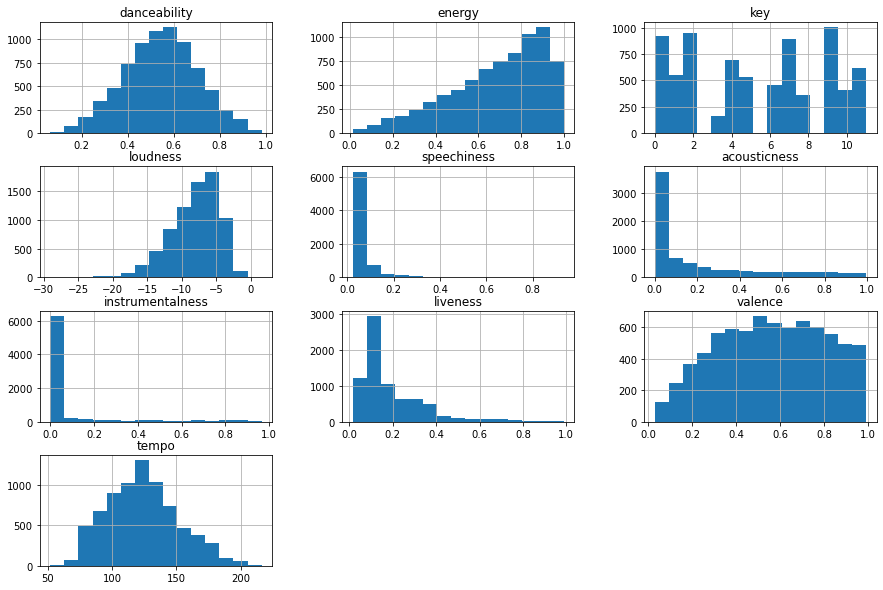

In [88]:
#look at the distribution 
hugeplaylist.hist(bins=15, figsize=(15,10));

In [89]:
# Song as index! yay!
hugeplaylist.index = hugeplaylist.iloc[:,0]
# pick first column and turn it to index [:,_] - location

In [90]:
#keep rest of columns
hugeplaylist = hugeplaylist.iloc[:,1:]

In [91]:
# remove the header name
hugeplaylist.rename_axis(None,inplace=True)

In [93]:
hugeplaylist.head()
# such a pretty table

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Modern Love - 1999 Remaster,0.315,0.889,0,-8.192,0.0410,0.000376,0.002410,0.1330,0.961,181.329
West End Girls - 2001 Remaster,0.648,0.947,4,-6.617,0.0369,0.011400,0.056700,0.1050,0.602,113.255
Close To Me,0.724,0.523,11,-11.139,0.1160,0.074500,0.703000,0.0811,0.965,185.075
The Whole of the Moon - 2004 Remaster,0.606,0.794,0,-7.168,0.0291,0.119000,0.000007,0.1250,0.584,105.813
Love Will Tear Us Apart,0.443,0.956,2,-6.198,0.0511,0.000052,0.825000,0.1350,0.909,146.754


### Scaling

In [94]:
hugeplaylist_scaled = StandardScaler().fit_transform(hugeplaylist)

In [95]:
hugeplaylist_scaled.shape

(7560, 10)

In [96]:
hugeplaylist_scaled_df = pd.DataFrame(hugeplaylist_scaled,columns = ['danceability', 'energy', 
                                                                     'key', 'loudness', 
                                                                     'speechiness', 'acousticness', 
                                                                     'instrumentalness', 'liveness', 
                                                                     'valence', 'tempo'])

In [97]:
hugeplaylist_scaled_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.434690,0.925652,-1.487075,-0.035097,-0.374749,-0.765148,-0.370480,-0.387662,1.652740,2.057055
1,0.642423,1.188355,-0.369912,0.404123,-0.444537,-0.725913,-0.091907,-0.569584,0.170558,-0.389282
2,1.116479,-0.732095,1.585122,-0.856927,0.901868,-0.501334,3.224389,-0.724869,1.669254,2.191672
3,0.380445,0.495362,-1.487075,0.250466,-0.577306,-0.342955,-0.382809,-0.439640,0.096243,-0.656721
4,-0.636280,1.229119,-0.928493,0.520970,-0.202831,-0.766300,3.850396,-0.374667,1.438050,0.814553


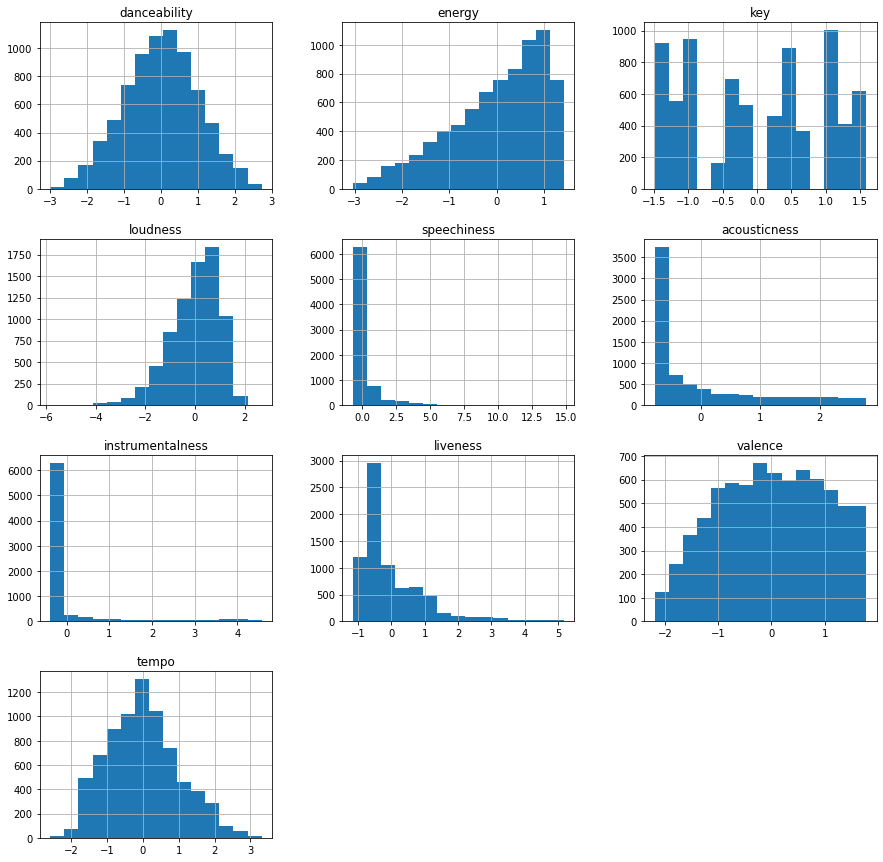

In [98]:
hugeplaylist_scaled_df.hist(bins=15, figsize=(15,15));

In [99]:
hugeplaylist_scaled_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,7.560000e+03,7.560000e+03,7.560000e+03,7.560000e+03,7.560000e+03,7.560000e+03,7.560000e+03,7.560000e+03,7.560000e+03,7.560000e+03
mean,3.500286e-16,-5.543919e-16,-1.167203e-16,-7.209841e-17,2.126899e-16,2.377287e-16,3.229706e-16,-2.182264e-16,3.561892e-16,-2.105165e-16
std,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00
min,-3.002193e+00,-3.042976e+00,-1.487075e+00,-5.843963e+00,-6.896478e-01,-7.664829e-01,-3.828461e-01,-1.159534e+00,-2.194739e+00,-2.593371e+00
25%,-6.861806e-01,-6.505663e-01,-9.284934e-01,-5.988331e-01,-5.075171e-01,-7.476589e-01,-3.828374e-01,-6.444652e-01,-7.914147e-01,-7.417822e-01
50%,1.866562e-02,2.100125e-01,-9.062166e-02,1.687570e-01,-3.390036e-01,-5.209092e-01,-3.817224e-01,-4.006562e-01,1.366989e-02,-4.299835e-02
75%,6.985615e-01,8.214764e-01,1.026541e+00,7.510379e-01,3.547082e-02,4.863136e-01,-3.181929e-01,4.244935e-01,8.228832e-01,6.075229e-01
max,2.725774e+00,1.423882e+00,1.585122e+00,2.691417e+00,1.484253e+01,2.774809e+00,4.568765e+00,5.173977e+00,1.780727e+00,3.313787e+00


## Clustering

In [100]:
kmeans = KMeans(n_clusters = 50)
#have to set a starting cluster number 

In [101]:
cluster = kmeans.fit(hugeplaylist_scaled_df)

In [102]:
cluster.cluster_centers_

array([[ 2.06872506e-01, -2.39953171e+00, -5.57103412e-02,
        -3.01230962e+00, -2.10572620e-01,  2.07054366e+00,
        -1.06485328e-01, -3.87280627e-01, -8.22272349e-01,
        -3.20940363e-01],
       [-5.91957659e-01, -7.21275969e-03, -7.53652934e-01,
        -8.24968503e-01, -2.49259821e-01, -4.81673003e-01,
        -1.98268371e-01, -2.84698882e-02,  5.13738720e-01,
         1.13942612e+00],
       [-2.27911867e-01,  5.92623385e-01, -9.63095744e-01,
         6.67306509e-01, -2.45851956e-01, -5.85327168e-01,
        -2.71883772e-01, -3.85839037e-01,  2.67682731e-02,
        -1.01802552e+00],
       [-8.16374287e-01,  8.20078106e-01,  4.84829378e-01,
         8.89894648e-01, -6.19976253e-02, -6.54012236e-01,
        -2.40460082e-01,  1.05503121e+00, -7.58330210e-01,
        -9.69133887e-01],
       [ 8.76363732e-01,  5.83419812e-01,  9.12582592e-01,
         5.79487041e-01, -2.67900140e-01, -3.99417187e-01,
        -3.09080202e-01, -5.42061387e-01,  1.21793455e+00,
        -8.

In [103]:
cluster.labels_

array([ 1,  2, 43, ..., 19,  0, 39], dtype=int32)

In [104]:
#bring cluster into data frame
hugeplaylist_cluster = hugeplaylist.copy()
hugeplaylist_cluster['cluster'] = cluster.labels_

In [105]:
hugeplaylist_cluster.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Modern Love - 1999 Remaster,0.315,0.889,0,-8.192,0.0410,0.000376,0.002410,0.1330,0.961,181.329,1
West End Girls - 2001 Remaster,0.648,0.947,4,-6.617,0.0369,0.011400,0.056700,0.1050,0.602,113.255,2
Close To Me,0.724,0.523,11,-11.139,0.1160,0.074500,0.703000,0.0811,0.965,185.075,43
The Whole of the Moon - 2004 Remaster,0.606,0.794,0,-7.168,0.0291,0.119000,0.000007,0.1250,0.584,105.813,2
Love Will Tear Us Apart,0.443,0.956,2,-6.198,0.0511,0.000052,0.825000,0.1350,0.909,146.754,19


### Visualizing clusters yay!

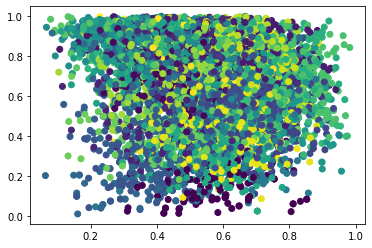

In [106]:
plt.scatter(hugeplaylist_cluster.iloc[:,0], hugeplaylist_cluster.iloc[:,1], c = hugeplaylist_cluster.iloc[:,10])
# y = danceability, x = energy, colour = cluster
# also, looks like confetti falling

#### Now in 3D!

In [102]:
hugeplaylist_cluster.head(1)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Modern Love - 1999 Remaster,0.315,0.889,0,-8.192,0.041,0.000376,0.00241,0.133,0.961,181.329,18


In [103]:
markersize = hugeplaylist_cluster['energy']
markercolour = hugeplaylist_cluster['cluster']

fig1 = go.Scatter3d(x = hugeplaylist_cluster['danceability'],
                  y = hugeplaylist_cluster['loudness'],
                  z = hugeplaylist_cluster['acousticness'],
                 marker = dict (size = markersize,
                              color = markercolour,
                              opacity = 0.9,
                              colorscale = 'Blues'),
                 line = dict (width = 0.2),
                 mode = 'markers')
# making the layout 
mylayout = go.Layout(scene = dict(xaxis = dict(title = 'danceability'),
                                  yaxis = dict(title = 'loudness'),
                                  zaxis = dict(title = 'acousticness')))

In [104]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open = True,
                   filename = ("5Dplot.html"));
# yeah, if you believe in Santa you might manage to see the liiiiiittle dots, not really useful

### Finding the right number of clusters - KMeans

In [107]:
# checkign the current value
kmeans.inertia_

22861.607769706185

In [108]:
# trying another random value
kmeans = KMeans(n_clusters = 38)
kmeans.fit(hugeplaylist_scaled_df)
print(kmeans.inertia_)

24798.932104613275


In [109]:
K = range(1, 80, 3)
# range of k to consider

In [110]:
# gathering the inertia values
inertia = []
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 40)
    kmeans.fit(hugeplaylist_scaled_df) # scaled version
    inertia.append(kmeans.inertia_)
    
print(inertia)
# gives you a list of inertias

[75600.00000000003, 51649.639321314906, 41276.512364374285, 36616.68457778242, 33946.21170120229, 32039.156201406404, 30460.081815974587, 29163.98551106741, 28061.34712264969, 27233.322192277854, 26387.942410805503, 25651.851809080712, 25072.004434621984, 24537.881385231864, 24028.331357343788, 23496.75405598925, 23041.211984980924, 22624.52191014321, 22204.089924321088, 21884.496727108184, 21613.721032948808, 21251.411939302914, 20881.12083715528, 20623.874400341298, 20422.331752247715, 20062.531695228136, 19899.872508831933]


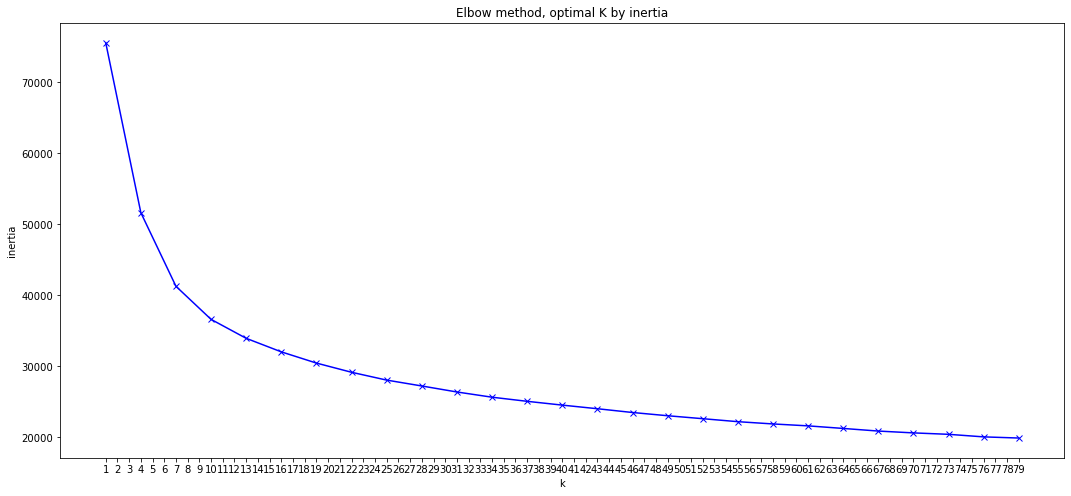

In [111]:
# plotting it
plt.figure(figsize = (18,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K) + 1, 1.0))
plt.title('Elbow method, optimal K by inertia');

In [112]:
# oh well... 9 seems to be the best number

#### Using the 'right' number of clusters now

In [113]:
kmeans = KMeans(n_clusters = 9)

In [114]:
cluster = kmeans.fit(hugeplaylist_scaled_df)

In [115]:
cluster.labels_

array([3, 8, 2, ..., 2, 4, 6], dtype=int32)

In [116]:
cluster.cluster_centers_

array([[-5.72155858e-01,  2.64512291e-01, -2.55771782e-01,
         4.44544958e-01, -2.37431336e-01, -4.94053292e-01,
        -2.52646693e-01, -1.29710053e-01, -9.02586376e-01,
        -5.97587929e-01],
       [ 4.64786536e-01,  5.56001716e-01,  9.50281296e-01,
         4.73976100e-01, -1.76025479e-01, -4.42419340e-01,
        -2.66878144e-01, -2.14455744e-01,  6.43546533e-01,
        -1.58555109e-01],
       [-1.11864006e-01,  1.42500824e-01,  8.68281472e-02,
        -1.83667621e-01, -1.54035929e-01, -2.21990485e-01,
         3.18031589e+00, -5.71555188e-02, -2.63233298e-01,
         2.05321543e-02],
       [-1.05255656e+00,  7.11665583e-01,  1.07801240e-01,
         6.19085612e-01,  1.97350471e-01, -5.62608660e-01,
        -2.30679466e-01, -3.06647067e-03, -2.51689701e-01,
         1.37660155e+00],
       [-2.77407192e-01, -1.75495450e+00, -1.26602074e-01,
        -1.24726149e+00, -3.65930744e-01,  1.77288906e+00,
        -1.65775298e-01, -2.92627718e-01, -9.41803147e-01,
        -3.

In [117]:
#bring cluster into data frame
hugeplaylist_c = hugeplaylist.copy()
hugeplaylist_c['cluster'] = cluster.labels_

In [118]:
hugeplaylist_c.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Modern Love - 1999 Remaster,0.315,0.889,0,-8.192,0.0410,0.000376,0.002410,0.1330,0.961,181.329,3
West End Girls - 2001 Remaster,0.648,0.947,4,-6.617,0.0369,0.011400,0.056700,0.1050,0.602,113.255,8
Close To Me,0.724,0.523,11,-11.139,0.1160,0.074500,0.703000,0.0811,0.965,185.075,2
The Whole of the Moon - 2004 Remaster,0.606,0.794,0,-7.168,0.0291,0.119000,0.000007,0.1250,0.584,105.813,8
Love Will Tear Us Apart,0.443,0.956,2,-6.198,0.0511,0.000052,0.825000,0.1350,0.909,146.754,2


In [119]:
hugeplaylist_c['cluster'].value_counts()

8    1158
1    1139
0    1106
3    1081
4     949
5     873
2     543
6     409
7     302
Name: cluster, dtype: int64

In [120]:
### Adding the cluster column to the original dataframe and reoganizing the data

In [121]:
huge_playlist['cluster'] = hugeplaylist_c['cluster'].values

In [122]:
huge_playlist.head()

,song_name,song_id,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Modern Love - 1999 Remaster,7LyIoUsiMtelB1I0I4drEF,David Bowie,0.315,0.889,0,-8.192,1,0.0410,0.000376,...,0.961,181.329,audio_features,7LyIoUsiMtelB1I0I4drEF,spotify:track:7LyIoUsiMtelB1I0I4drEF,https://api.spotify.com/v1/tracks/7LyIoUsiMtel...,https://api.spotify.com/v1/audio-analysis/7LyI...,288467,4,3
1,West End Girls - 2001 Remaster,7FlwylpJSe3ea6m1IrkizS,Pet Shop Boys,0.648,0.947,4,-6.617,0,0.0369,0.011400,...,0.602,113.255,audio_features,7FlwylpJSe3ea6m1IrkizS,spotify:track:7FlwylpJSe3ea6m1IrkizS,https://api.spotify.com/v1/tracks/7FlwylpJSe3e...,https://api.spotify.com/v1/audio-analysis/7Flw...,245360,4,8
2,Close To Me,4xiyq1iRdsxuU1BPUJ490Z,The Cure,0.724,0.523,11,-11.139,1,0.1160,0.074500,...,0.965,185.075,audio_features,4xiyq1iRdsxuU1BPUJ490Z,spotify:track:4xiyq1iRdsxuU1BPUJ490Z,https://api.spotify.com/v1/tracks/4xiyq1iRdsxu...,https://api.spotify.com/v1/audio-analysis/4xiy...,203267,4,2
3,The Whole of the Moon - 2004 Remaster,15mZo1Kah03g8CTLbSsWrr,The Waterboys,0.606,0.794,0,-7.168,1,0.0291,0.119000,...,0.584,105.813,audio_features,15mZo1Kah03g8CTLbSsWrr,spotify:track:15mZo1Kah03g8CTLbSsWrr,https://api.spotify.com/v1/tracks/15mZo1Kah03g...,https://api.spotify.com/v1/audio-analysis/15mZ...,302827,4,8
4,Love Will Tear Us Apart,2JO3HwMRPeya8bXbtbyPcf,Joy Division,0.443,0.956,2,-6.198,1,0.0511,0.000052,...,0.909,146.754,audio_features,2JO3HwMRPeya8bXbtbyPcf,spotify:track:2JO3HwMRPeya8bXbtbyPcf,https://api.spotify.com/v1/tracks/2JO3HwMRPeya...,https://api.spotify.com/v1/audio-analysis/2JO3...,206867,4,2


### The cluster thingy

In [122]:
# choosing a song and trying to locate it with spotipy
song = 'wish you were here'
song = sp.search(q = song, limit = 1)
song_id = song['tracks']
song_id = song_id['items'][0]['id']
song_features = sp.audio_features(song_id)
song_data = pd.DataFrame(song_features, index= [0])
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1 non-null      float64
 1   energy            1 non-null      float64
 2   key               1 non-null      int64  
 3   loudness          1 non-null      float64
 4   mode              1 non-null      int64  
 5   speechiness       1 non-null      float64
 6   acousticness      1 non-null      float64
 7   instrumentalness  1 non-null      float64
 8   liveness          1 non-null      float64
 9   valence           1 non-null      float64
 10  tempo             1 non-null      float64
 11  type              1 non-null      object 
 12  id                1 non-null      object 
 13  uri               1 non-null      object 
 14  track_href        1 non-null      object 
 15  analysis_url      1 non-null      object 
 16  duration_ms       1 non-null      int64  
 17  t

In [123]:
# part 2
song = 'wish you were here'    
song = sp.search(q = song, limit = 1)
song_id = song['tracks']
song_id = song_id['items'][0]['id']
song_features = sp.audio_features(song_id)
song_data = pd.DataFrame(song_features, index= [0])
# droping the numeric columns i didn't use
song_data.drop(['mode', 'duration_ms', 'time_signature'], axis = 1, inplace = True) 
song_num = song_data._get_numeric_data()
song_num.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.481,0.262,7,-15.73,0.0414,0.735,0.0114,0.832,0.375,122.861


In [136]:
# creating the cluster thingy
def song_cluster(song):
    song = sp.search(q = song, limit = 1)
    song_id = song['tracks']
    song_id = song_id['items'][0]['id']
    song_features = sp.audio_features(song_id)
    song_data = pd.DataFrame(song_features, index= [0])
   # droping the numeric columns i didn't use
    song_data.drop(['mode', 'duration_ms', 'time_signature'], axis = 1, inplace = True)  
    song_num = song_data._get_numeric_data()
    song_scaled = StandardScaler().fit_transform(song_num)
    cluster = kmeans.predict(song_scaled)
    song_cluster = huge_playlist.loc[huge_playlist['cluster'] == int(cluster)]
    song_cluster.reset_index(drop=True, inplace=True) 
    song_name_id = random.choice(song_cluster["id"])
    songname = sp.track(song_name_id)['name']
    artist = sp.track(song_name_id)['artists'][0]['name']
    return print('That song is not hot right now. But listen to ' + songname + ' by ' + artist + ". I think you'll like it!.")
# trying it out
song_cluster('wish you were here')

That song is not hot right now. But listen to Nancy Boy by Placebo. I think you'll like it!.


## The Ultimate Suggester

In [135]:
# new suggester attempt
def second_suggester():
    song = str(input("What song do you have in mind?: ").lower().replace(" ", ''))
    # check hot 100
    check = billboard_top100[billboard_top100['song'].str.lower().str.replace(" ","").str.contains(song)]
    # get index
    index = check.index.tolist()
    if len(check) == 0:
        song_cluster(song)
        song2 = str(input("Want to try again? [y/n]: ")).lower().replace(" ", '')
        if song2 == 'y':
            print('Awesome! Here, have another go:')
            second_suggester()
        elif song2 == 'n':
            print('Oh well, your bad, this is an awesome recommender')
        else:
            print("Oh, come on, that's not an answer")
    else:
        answer1 = input("Are you thinking about '" + billboard_top100.song[index].values[0] + "' by '" + billboard_top100.artist[index].values[0] + "'? [y/n]: ")
    #make a song suggestion
        if answer1.lower() == 'y':
            suggestion = billboard_top100.sample().index.tolist()
            print("That's a hot song! Listen to '" + billboard_top100['song'][suggestion].item() + "' by '" + billboard_top100['artist'][suggestion].item() + "' I think you'll like it.")
            song2 = str(input("Want to try again? [y/n]: ")).lower().replace(" ", '')
            if song2 == 'y':
                print('Awesome! Here, have another go:')
                second_suggester()
            elif song2 == 'n':
                print('Oh well, your bad, this is an awesome recommender')
            else:
                print("Oh, come on, that's not an answer")
        elif answer1.lower() == 'n':
            song_cluster(song)
            song2 = str(input("Want to try again? [y/n]: ")).lower().replace(" ", '')
            if song2 == 'y':
                print('Awesome! Here, have another go:')
                second_suggester()
            elif song2 == 'n':
                print('Oh well, your bad, this is an awesome recommender')
            else:
                print("Oh, come on, that's not an answer")
second_suggester()

What song do you have in mind?: Christmas
Are you thinking about 'All I Want For Christmas Is You' by 'Mariah Carey'? [y/n]: n
That song is not hot right now. But listen to Got Bones by Catchfire Barons. I think you'll like it!.
Want to try again? [y/n]: y
Awesome! Here, have another go:
What song do you have in mind?: Last Christmas
Are you thinking about 'Last Christmas' by 'Wham!'? [y/n]: y
That's a hot song! Listen to 'Stay' by 'The Kid LAROI & Justin Bieber' I think you'll like it.
Want to try again? [y/n]: y
Awesome! Here, have another go:
What song do you have in mind?: Respect
That song is not hot right now. But listen to Jump the Gun by The Ten Bells. I think you'll like it!.
Want to try again? [y/n]: y
Awesome! Here, have another go:
What song do you have in mind?: Back in Black
That song is not hot right now. But listen to Best of You by Foo Fighters. I think you'll like it!.
Want to try again? [y/n]: Time
Oh, come on, that's not an answer
